In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import re
import matplotlib.pyplot as plt

# Import Data
df = pd.read_csv("../data/partial_scores_v2.csv")

In [2]:
for index, row in df.iterrows():
    df.loc[index, 'lookback_window'] = int(re.sub("[^0-9]", "", row['dataset']))
    df.loc[index, 'aggr_type'] = row['dataset'].split(":")[0]

In [3]:
df.head(1)

,Unnamed: 0,dict_type,dataset,num_obs,model_name,accuracy,precision,recall,roc_auc,lookback_window,aggr_type
0,0,cumu_dfs_dict,Cumulative Data: 1 Fight Lookback Window,6914,RandomForestClassifier,0.589087,0.585427,0.565246,0.61841,1.0,Cumulative Data


In [4]:
df['aggr_type'].value_counts()

Cumulative Data    20
Name: aggr_type, dtype: int64

In [5]:
# subset data so that it only shows for 
cumulative_df = df.loc[df['aggr_type'] == "Cumulative Data"]
cumulative_df = cumulative_df[cumulative_df['dict_type'] == "cumu_dfs_dict"]

In [7]:
cumulative_df

,Unnamed: 0,dict_type,dataset,num_obs,model_name,accuracy,precision,recall,roc_auc,lookback_window,aggr_type
0,0,cumu_dfs_dict,Cumulative Data: 1 Fight Lookback Window,6914,RandomForestClassifier,0.589087,0.585427,0.565246,0.618410,1.0,Cumulative Data
1,1,cumu_dfs_dict,Cumulative Data: 1 Fight Lookback Window,6914,LogisticRegression,0.552505,0.549287,0.504708,0.573533,1.0,Cumulative Data
2,2,cumu_dfs_dict,Cumulative Data: 2 Fight Lookback Window,5006,RandomForestClassifier,0.569498,0.566291,0.535040,0.590993,2.0,Cumulative Data
3,3,cumu_dfs_dict,Cumulative Data: 2 Fight Lookback Window,5006,LogisticRegression,0.542940,0.539227,0.502649,0.560074,2.0,Cumulative Data
4,4,cumu_dfs_dict,Cumulative Data: 3 Fight Lookback Window,3780,RandomForestClassifier,0.573261,0.567054,0.557795,0.599265,3.0,Cumulative Data
5,5,cumu_dfs_dict,Cumulative Data: 3 Fight Lookback Window,3780,LogisticRegression,0.542579,0.537529,0.504569,0.559633,3.0,Cumulative Data
6,6,cumu_dfs_dict,Cumulative Data: 4 Fight Lookback Window,2884,RandomForestClassifier,0.557544,0.551661,0.540845,0.575129,4.0,Cumulative Data
7,7,cumu_dfs_dict,Cumulative Data: 4 Fight Lookback Window,2884,LogisticRegression,0.557558,0.551930,0.538028,0.584160,4.0,Cumulative Data
8,8,cumu_dfs_dict,Cumulative Data: 5 Fight Lookback Window,2248,RandomForestClassifier,0.533346,0.526007,0.505882,0.552977,5.0,Cumulative Data
9,9,cumu_dfs_dict,Cumulative Data: 5 Fight Lookback Window,2248,LogisticRegression,0.527584,0.519745,0.508597,0.558876,5.0,Cumulative Data


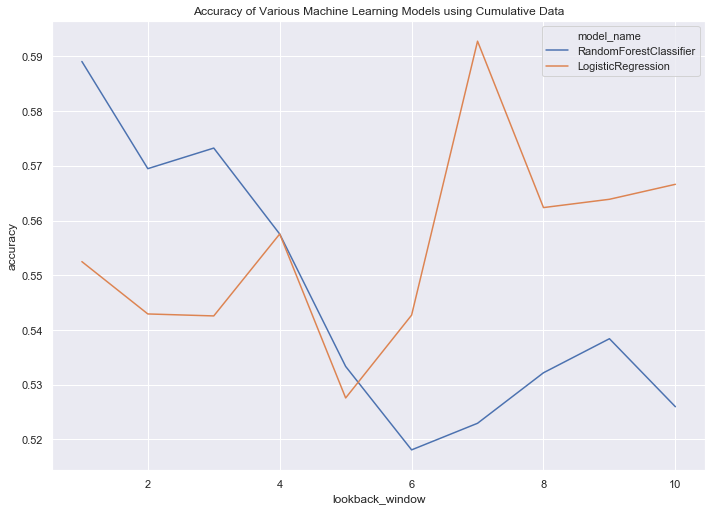

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

cumulative_plot = sns.lineplot(x="lookback_window", y="accuracy", hue="model_name", data = cumulative_df, ax = ax)
cumulative_plot = cumulative_plot.set_title("Accuracy of Various Machine Learning Models using Cumulative Data")

In [52]:
fig.savefig('../data/plots/cumulative_v1.png')

In [47]:
# subset data so that it only shows for 
exact_df = df.loc[df['aggr_type'] == "Exact Data"]
exact_df = exact_df[exact_df['dict_type'] == "cumu_dfs_dict"]

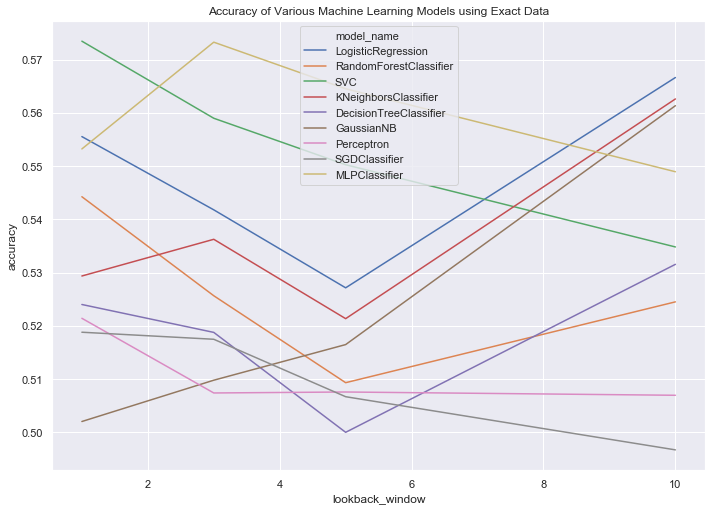

In [48]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

cumulative_plot = sns.lineplot(x="lookback_window", y="accuracy", hue="model_name", data = cumulative_df, ax = ax)
cumulative_plot = cumulative_plot.set_title("Accuracy of Various Machine Learning Models using Exact Data")

In [49]:
fig.savefig('../data/plots/exact_v1.png')

In [53]:
turn_in_df = df[df['dict_type'] == "cumu_dfs_dict"]

In [55]:
turn_in_df.to_csv("../data/scores/initial_scores.csv")